In [10]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from numpy import savetxt
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline


from trackers.clearml_tracker import ClearMLTracker
from utils import draw_landmarks_on_image
from keypoint_generator import KeypointGenerator
from models.keypoint_classification_model import KeypointClassificationModel


# Init experiment tracker

In [11]:
#tracker = ClearMLTracker("simon-ai", f"default")

# Generate keypoints

## Test keypoints

I0000 00:00:1719322668.752210 5055637 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M2
W0000 00:00:1719322668.769963 5696877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719322668.783582 5696877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


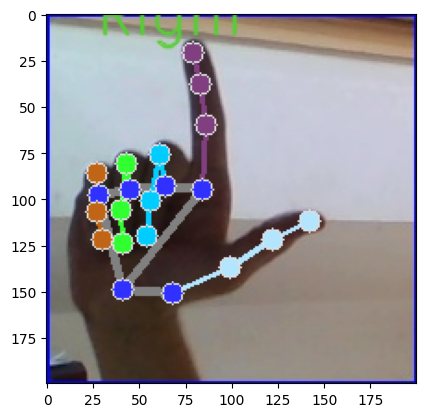

In [12]:
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

image = mp.Image.create_from_file('../datasets/asl_alphabet_train/L/L1.jpg')

detection_result = detector.detect(image)

annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image)


## Create keypoints for the entire dataset

In [13]:
generator = KeypointGenerator('hand_landmarker.task')
generator.generate_keypoints('../datasets/keypoints.csv')

I0000 00:00:1719322668.957724 5055637 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M2
W0000 00:00:1719322668.962585 5696883 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719322668.968062 5696883 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
